In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

from modules import *

In [5]:
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.family'] = 'Arial'

In [6]:
# load data
with open('data/data_simulation/data_factor.p', 'rb') as f:
    data = pickle.load(f)
print(data.keys())

correlation_set = data['correlation_set']
n_depth_set = data['n_depth_set']
n_branch_set = data['n_branch_set']
n_sample_set = data['n_sample_set']
n_prob = data['n_prob']
n_world = data['n_world']
n_test = data['n_test']
sig_r = data['sig_r']
expected_rewards = data['expected_rewards']
max_rewards = data['max_rewards']
expected_accuracies = data['expected_accuracies']

dict_keys(['correlation_set', 'n_depth_set', 'n_branch_set', 'n_sample_set', 'n_prob', 'n_world', 'n_test', 'sig_r', 'expected_rewards', 'max_rewards', 'expected_accuracies'])


In [7]:
optimal_rollout_nums = np.zeros((len(correlation_set), len(n_branch_set), len(n_depth_set), n_prob))
optimal_reward_rates = np.zeros((len(correlation_set), len(n_branch_set), len(n_depth_set), n_prob))

t_ratio = 0.05

# loop through correlations
for i_correlation, correlation in enumerate(correlation_set):

    # loop through branches
    for i_branch, n_branch in enumerate(n_branch_set):

        # loop through depths
        for i_depth, n_depth in enumerate(n_depth_set):

            # loop through transition probabilities
            for i_prob in range(n_prob):
        
                exrew = expected_rewards[i_correlation, i_branch, i_depth, i_prob, ...]
                exrew  = exrew / (1 + np.array(n_sample_set)[:, None] * t_ratio)
        
                m = np.mean(exrew, axis = -1) # average over worlds
                norm = np.mean(max_rewards[i_correlation, i_branch, i_depth, i_prob, :])
                m /= norm
        
                optimal_rollout_nums[i_correlation, i_branch, i_depth, i_prob] = n_sample_set[np.argmax(m)]
                optimal_reward_rates[i_correlation, i_branch, i_depth, i_prob] = np.max(m)

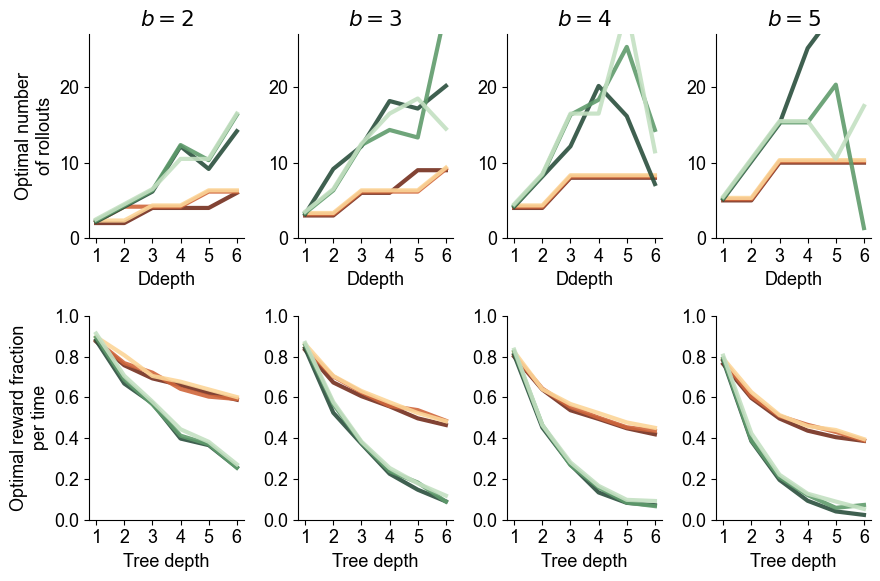

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (9, 6))

for i_correlation, correlation in enumerate(correlation_set):
    if i_correlation:
        colors = ['#2A4F3D', '#5F9B6C', '#C4E0C2']
    else:
        colors = ['#742E1E', '#D0663B', '#FCD598']

    for i_branch, n_branch in enumerate(n_branch_set):

        ax = axes[0, i_branch]
        for i_prob in range(3):
            d = (i_correlation + i_prob) / 6
            ax.plot(n_depth_set, optimal_rollout_nums[i_correlation, i_branch, :, i_prob] + d, lw = 3, color = colors[i_prob], label = i_prob, alpha = 0.9)
        ax.set_xticks(n_depth_set)
        ax.set_ylim(0, 27)
        ax.set_xlabel('Ddepth')
        ax.set_title('$b = %.0f$' % n_branch)
        if i_branch == 0:
            ax.set_ylabel('Optimal number\nof rollouts')

        ax = axes[1, i_branch]
        for i_prob in range(3):
            d = (i_correlation + i_prob) / 80
            ax.plot(n_depth_set, optimal_reward_rates[i_correlation, i_branch, :, i_prob] + d, lw = 3, color = colors[i_prob], label = i_prob, alpha = 0.9)
        ax.set_xticks(n_depth_set)
        ax.set_ylim(0, 1)
        ax.set_xlabel('Tree depth')
        if i_branch == 0:
            ax.set_ylabel('Optimal reward fraction\nper time')

    # handles, labels = ax.get_legend_handles_labels()
    # plt.legend(handles, ['Uniform transition', None, 'Deterministic transition'], bbox_to_anchor = (1, 0.5), ncol = 1, loc = 'center left', fontsize = 10, frameon = False, title = 'Correlated environment', title_fontsize = '11')
    # plt.legend(handles[3:], ['Uniform transition', None, 'Deterministic transition'], bbox_to_anchor = (1, 0.5), ncol = 1, loc = 'center left', fontsize = 10, frameon = False, title = 'Uncorrelated environment', title_fontsize = '11')
    
plt.tight_layout()
# plt.show()
plt.savefig('figures/figures_factor/p_reward.pdf', bbox_inches = 'tight')

In [9]:
optimal_rollout_nums = np.zeros((len(correlation_set), len(n_branch_set), len(n_depth_set), n_prob))
optimal_accuracy_rates = np.zeros((len(correlation_set), len(n_branch_set), len(n_depth_set), n_prob))

t_ratio = 0.05

# loop through correlations
for i_correlation, correlation in enumerate(correlation_set):

    # loop through branches
    for i_branch, n_branch in enumerate(n_branch_set):

        # compute chance accuracy
        chance_acc = 1 / n_branch

        # loop through depths
        for i_depth, n_depth in enumerate(n_depth_set):

            # loop through transition probabilities
            for i_prob in range(n_prob):
        
                exacc = expected_accuracies[i_correlation, i_branch, i_depth, i_prob, ...]
                exacc = (exacc - chance_acc) / (1 - chance_acc)
                exacc = exacc / (1 + np.array(n_sample_set)[:, None] * t_ratio)

                m = np.mean(exacc, axis = -1) # average over worlds
        
                optimal_rollout_nums[i_correlation, i_branch, i_depth, i_prob] = n_sample_set[np.argmax(m)]
                optimal_accuracy_rates[i_correlation, i_branch, i_depth, i_prob] = np.max(m)

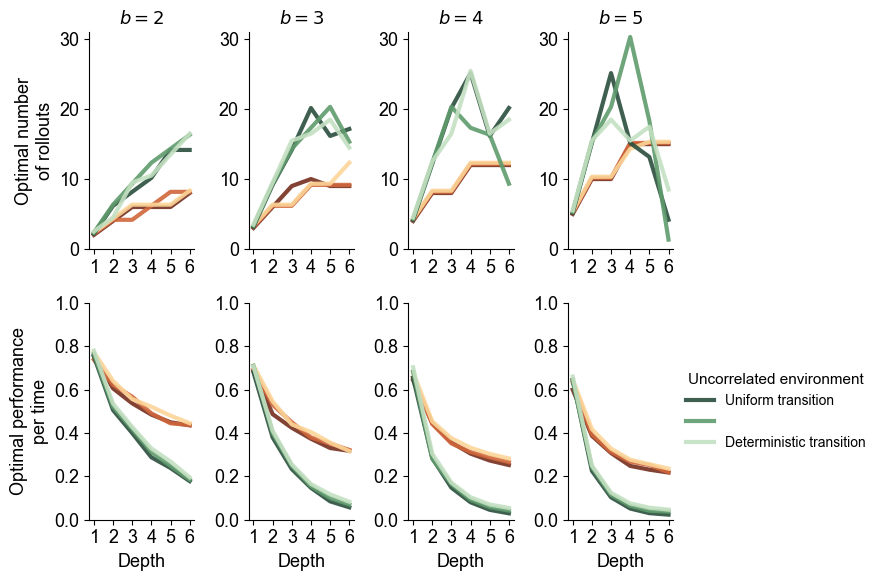

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (9, 6))

for i_correlation, correlation in enumerate(correlation_set):
    if i_correlation:
        colors = ['#2A4F3D', '#5F9B6C', '#C4E0C2']
    else:
        colors = ['#742E1E', '#D0663B', '#FCD598']

    for i_branch, n_branch in enumerate(n_branch_set):

        ax = axes[0, i_branch]
        for i_prob in range(3):
            d = (i_correlation + i_prob) / 6
            ax.plot(n_depth_set, optimal_rollout_nums[i_correlation, i_branch, :, i_prob] + d, lw = 3, color = colors[i_prob], label = i_prob, alpha = 0.9)
        ax.set_xticks(n_depth_set)
        ax.set_ylim(0, 31)
        if i_branch == 0:
            ax.set_ylabel('Optimal number\nof rollouts')
        ax.set_title('$b = %.0f$' % n_branch, fontsize = 13)

        ax = axes[1, i_branch]
        for i_prob in range(3):
            d = (i_correlation + i_prob) / 80
            ax.plot(n_depth_set, optimal_accuracy_rates[i_correlation, i_branch, :, i_prob] + d, lw = 3, color = colors[i_prob], label = i_prob, alpha = 0.9)
        # if i_correlation == 0:
        #     ax.axhline(y = 1 / n_branch, color = 'black', linestyle = '--')
        ax.set_xticks(n_depth_set)
        ax.set_ylim(0, 1)
        ax.set_xlabel('Depth')
        if i_branch == 0:
            ax.set_ylabel('Optimal performance\nper time')

    handles, labels = ax.get_legend_handles_labels()
    # plt.legend(handles, ['Uniform transition', None, 'Deterministic transition'], bbox_to_anchor = (1, 0.5), ncol = 1, loc = 'center left', fontsize = 10, frameon = False, title = 'Correlated environment', title_fontsize = '11')
    plt.legend(handles[3:], ['Uniform transition', None, 'Deterministic transition'], bbox_to_anchor = (1, 0.5), ncol = 1, loc = 'center left', fontsize = 10, frameon = False, title = 'Uncorrelated environment', title_fontsize = '11')
    
plt.tight_layout()
# plt.show()
plt.savefig('figures/figures_factor/p_accuracy.pdf', bbox_inches = 'tight')